In [109]:
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.feature_selection import chi2, f_classif, SelectFromModel, SelectKBest, f_regression, VarianceThreshold
from sklearn.datasets import load_iris, load_linnerud
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor

data = load_iris()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
############## SelectKBest

x = df.iloc[::, :-1]
y = df.iloc[::, -1]

selector = SelectKBest(score_func=f_classif, k=2)
selector.fit(df.iloc[::, :-1], y)

SelectKBest(k=2)

In [4]:
transform = selector.fit_transform(x, y)

print(f' score:  {selector.scores_}\n p_value : {selector.pvalues_} ')

 score:  [ 119.26450218   49.16004009 1180.16118225  960.0071468 ]
 p_value : [1.66966919e-31 4.49201713e-17 2.85677661e-91 4.16944584e-85] 


In [5]:
select_features = selector.get_support(indices=True)

df.iloc[::, select_features].head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [6]:
scores_feature = pd.DataFrame({'feature': data.feature_names, 'score': selector.scores_})
scores_feature.nlargest(2, 'score')

,feature,score
2,petal length (cm),1180.161182
3,petal width (cm),960.007147


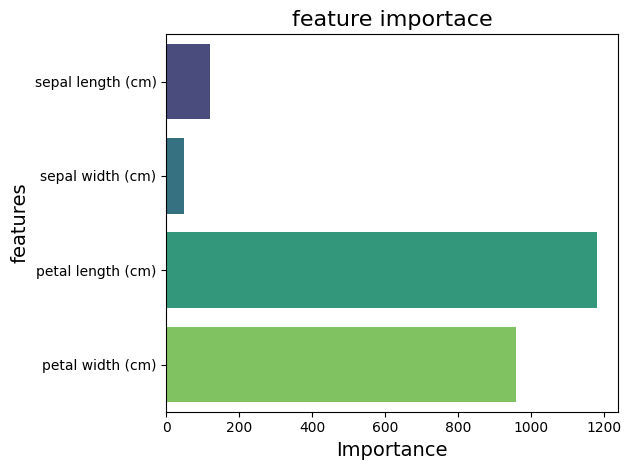

In [7]:

sns.barplot(x=scores_feature['score'], y=scores_feature['feature'], palette='viridis')
plt.title('feature importace', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('features', fontsize=14)
plt.tight_layout()
plt.show()

------------------

### make models

In [13]:
import warnings
warnings.filterwarnings('ignore')

model_1 = LogisticRegression()
model_1.fit(x, y)

LogisticRegression()

In [10]:
model_2 = LogisticRegression()
model_2.fit(transform, y)

LogisticRegression()

In [11]:
print(f' model_1 original data: {model_1.score(x, y)}\n model_2 transform_data: {model_2.score(transform, y)}')

 model_1 original data: 0.9733333333333334
 model_2 transform_data: 0.9666666666666667


In [12]:
################### SelectKBest end

--------------------

In [17]:
##################  VarianceThreshold

f = x.columns
means = []
for i in range(x.shape[1]):
    means.append(x.iloc[::, i].mean())
    print(f' feature :{f[i]}  mean: {x.iloc[::, i].mean()}')

 feature :sepal length (cm)  mean: 5.843333333333334
 feature :sepal width (cm)  mean: 3.0573333333333337
 feature :petal length (cm)  mean: 3.7580000000000005
 feature :petal width (cm)  mean: 1.1993333333333336


In [19]:
v = []
for i in range(x.shape[1]):
    variance = sum((x.values[:, i] - means[i]) ** 2) / x.shape[0]
    v.append(variance)

In [20]:
v

[0.6811222222222221,
 0.18871288888888882,
 3.0955026666666696,
 0.5771328888888886]

In [21]:
x.var()

sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64

In [61]:
select = VarianceThreshold(threshold=0.5)

transform_x = select.fit_transform(x)

In [64]:
m1 = LogisticRegression()
m1.fit(x, y)

m2 = LogisticRegression()
m2.fit(transform_x, y)

LogisticRegression()

In [65]:
print(m1.score(x, y), '\n' ,m2.score(transform_x, y))

0.9733333333333334 
 0.9666666666666667


------------------------------

In [80]:
titanic_DF = pd.read_csv('train.csv')

titanic_DF = titanic_DF[['Survived', 'Pclass', 'Age', 'Parch', 'SibSp', 'Fare']].dropna()

In [81]:
titanic_DF.var()

Survived       0.241533
Pclass         0.702663
Age          211.019125
Parch          0.728103
SibSp          0.864497
Fare        2800.413100
dtype: float64

In [92]:
x = titanic_DF.iloc[::, 1:]
y = titanic_DF.iloc[::, 1]

In [94]:
select_titanic = VarianceThreshold(threshold=0.5)
X = select_titanic.fit_transform(x, y)

In [95]:
m11 = LinearRegression()
m11.fit(x, y)

m22 = LinearRegression()
m22.fit(X, y)

LinearRegression()

In [96]:
print(m11.score(x, y), '\n' ,m22.score(X, y))

1.0 
 1.0


-----------

In [101]:
K_best = SelectKBest(f_classif, k=2)
K_best.fit(x, y)

SelectKBest(k=2)

In [102]:
K_best.scores_

array([         inf,  57.44348434,   0.30257726,   2.23189189,
       201.16989133])

In [104]:
selcet_best = K_best.fit_transform(x, y)
selcet_best

array([[ 3.    ,  7.25  ],
       [ 1.    , 71.2833],
       [ 3.    ,  7.925 ],
       ...,
       [ 1.    , 30.    ],
       [ 1.    , 30.    ],
       [ 3.    ,  7.75  ]])

------

In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model_tree_D = DecisionTreeClassifier(max_depth=3)
model_tree_R = RandomForestClassifier(max_depth=3)

model_tree_D.fit(x, y)
model_tree_R.fit(x, y)

RandomForestClassifier(max_depth=3)

In [107]:
print(model_tree_D.feature_importances_)
print(model_tree_R.feature_importances_)

[1. 0. 0. 0. 0.]
[0.66132514 0.05032545 0.00656189 0.01226451 0.26952301]


In [111]:
from sklearn.linear_model import LassoCV

In [112]:
model_CV = LassoCV(cv=5)
model_CV.fit(x, y)

LassoCV(cv=5)

In [114]:
sfm = SelectFromModel(model_CV, prefit=True)
select = sfm.fit_transform(x, y)

In [117]:
select

array([[ 3.    , 22.    ,  7.25  ],
       [ 1.    , 38.    , 71.2833],
       [ 3.    , 26.    ,  7.925 ],
       ...,
       [ 1.    , 19.    , 30.    ],
       [ 1.    , 26.    , 30.    ],
       [ 3.    , 32.    ,  7.75  ]])

In [122]:
sfm.get_support(indices=True)

array([0, 1, 4], dtype=int64)

-------------

In [79]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel

x, y = make_classification(n_samples=50, n_features=5,
                           n_informative=3, n_clusters_per_class=2, n_classes=3,
                          random_state=1, weights=[0.2, 0.1, 0.7])

In [80]:
df_class = pd.DataFrame(x, columns=range(0, 5))
df_class['target'] = y

In [81]:
df_class.var()

0         1.431826
1         1.987485
2         3.616823
3         1.406890
4         3.335936
target    0.702449
dtype: float64

In [73]:
model_random = RandomForestClassifier(random_state=1)
model_random.fit(x, y)

RandomForestClassifier(random_state=1)

In [67]:
y_pred = model_random.predict(x)

print(metrics.accuracy_score(model_random.predict(x), y))

1.0


In [68]:
for i, feature in enumerate(model_random.feature_importances_):
    print(f' feature {i} | importance {feature:.3f}')

 feature 0 | importance 0.236
 feature 1 | importance 0.171
 feature 2 | importance 0.116
 feature 3 | importance 0.317
 feature 4 | importance 0.160


In [56]:
selected = SelectFromModel(model_random, threshold='mean', prefit=True)

x_transform = selected.fit_transform(x)

In [57]:
x_transform

array([[ 0.98078515,  1.27655555, -2.61722174],
       [-0.99631165, -0.10684088, -0.39408994],
       [-0.64872464,  1.42946469, -0.48205108],
       [ 1.15695777,  1.07367034, -1.55262811],
       [-0.85873351, -0.17991956, -0.33286317],
       [-1.70622136, -0.0059812 ,  1.00725255],
       [-0.76933238,  0.11305421, -1.21837057],
       [ 0.4740566 ,  2.21976258, -2.93681466],
       [ 0.93514663,  1.86269887,  1.12969051],
       [-2.55735631,  0.33898055, -1.53077933],
       [-1.6535438 , -0.64848612, -0.16767014],
       [-2.04096596,  0.25630168, -0.07503993],
       [-0.6891155 , -0.80387508, -1.78906097],
       [-0.95680577,  1.35544908, -3.31403579],
       [-0.03081925, -0.3507676 ,  0.11430512],
       [-1.17412641, -0.25302275, -0.99571994],
       [-1.89389518, -1.00507584,  0.39960691],
       [ 0.03822932,  0.26851059, -1.12529341],
       [-0.46605408,  1.4111968 , -0.53681467],
       [-1.28345197, -1.98498028, -0.3802162 ],
       [ 0.10652829,  1.33369108, -1.856

----------

In [21]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [2]:
x, y = make_classification(n_samples=10, n_features=10, n_classes=3,
                           n_clusters_per_class=2, n_informative=6, random_state=1, weights=[0.1, 0.1, 0.8])

In [3]:
display(x, y)

array([[ 1.32243076,  0.26936438,  2.86032843, -2.57897993, -1.45273347,
         0.98315873, -0.51926046,  1.9816982 , -1.41832109,  1.93177151],
       [ 1.1242254 ,  1.28273364,  1.15022741,  2.23164131, -2.54639056,
        -0.58640311,  2.30156351,  1.35670487,  3.19012111, -2.9926121 ],
       [ 1.25718996,  0.23842181, -0.67332088, -0.06269434, -1.79242981,
         0.46257204,  1.12854549, -1.36012629,  0.1917546 , -1.21616325],
       [ 1.45999738, -1.4009523 , -1.20521772, -0.82277839, -1.30089669,
        -0.27807789,  4.27398405,  2.16265516,  0.42063346, -1.54986447],
       [ 0.43661277,  0.45005077, -1.93423397, -0.15819476, -1.59435009,
         0.03822164,  2.53864293,  1.23019212, -1.59955556,  0.12930461],
       [ 0.73596985,  2.41193629, -1.28587413,  1.30942422, -1.78700548,
        -1.35136197,  0.48787537, -1.3410127 ,  1.21103266, -2.35724293],
       [ 1.09823813, -1.93603321, -0.8238499 ,  2.643503  ,  2.08469482,
         0.11515541, -0.44957663, -2.0361738 

array([1, 2, 2, 2, 2, 2, 0, 2, 2, 2])

In [4]:
df = pd.DataFrame(x, columns=range(0, 10))

mean_values = df.mean(axis=0)
center = df - mean_values

n_sample = df.shape[0]
cov_matrix = np.dot(center.T, center) / (n_sample - 1)

print(cov_matrix)

[[ 0.66724597 -0.28810548 -0.06446239 -0.31180125  0.38901573  0.20809559
  -0.40952582 -0.31107207 -0.4333513   0.46687102]
 [-0.28810548  2.54879504 -0.26587089  0.8504666  -1.07776706 -1.22748749
  -0.91039642 -0.39418771 -0.12893579 -0.27389068]
 [-0.06446239 -0.26587089  2.92465663 -0.54755215 -1.13487339  1.1114924
   0.17834732  1.51463358  1.04967736  0.0095477 ]
 [-0.31180125  0.8504666  -0.54755215  3.10853728  0.15971262 -0.90168866
  -0.34879488 -1.2797477   1.82352664 -1.44542869]
 [ 0.38901573 -1.07776706 -1.13487339  0.15971262  2.28213808 -0.15405791
  -1.43714946 -1.47587371 -0.83238332  1.04262864]
 [ 0.20809559 -1.22748749  1.1114924  -0.90168866 -0.15405791  1.27018619
   0.51012078  0.63400683  0.05554983  0.33191838]
 [-0.40952582 -0.91039642  0.17834732 -0.34879488 -1.43714946  0.51012078
   3.22815637  1.99206104  1.22314796 -1.6148353 ]
 [-0.31107207 -0.39418771  1.51463358 -1.2797477  -1.47587371  0.63400683
   1.99206104  2.75616387  0.25863153 -0.14521388]
 

In [5]:
print(np.cov(df, rowvar=False))

[[ 0.66724597 -0.28810548 -0.06446239 -0.31180125  0.38901573  0.20809559
  -0.40952582 -0.31107207 -0.4333513   0.46687102]
 [-0.28810548  2.54879504 -0.26587089  0.8504666  -1.07776706 -1.22748749
  -0.91039642 -0.39418771 -0.12893579 -0.27389068]
 [-0.06446239 -0.26587089  2.92465663 -0.54755215 -1.13487339  1.1114924
   0.17834732  1.51463358  1.04967736  0.0095477 ]
 [-0.31180125  0.8504666  -0.54755215  3.10853728  0.15971262 -0.90168866
  -0.34879488 -1.2797477   1.82352664 -1.44542869]
 [ 0.38901573 -1.07776706 -1.13487339  0.15971262  2.28213808 -0.15405791
  -1.43714946 -1.47587371 -0.83238332  1.04262864]
 [ 0.20809559 -1.22748749  1.1114924  -0.90168866 -0.15405791  1.27018619
   0.51012078  0.63400683  0.05554983  0.33191838]
 [-0.40952582 -0.91039642  0.17834732 -0.34879488 -1.43714946  0.51012078
   3.22815637  1.99206104  1.22314796 -1.6148353 ]
 [-0.31107207 -0.39418771  1.51463358 -1.2797477  -1.47587371  0.63400683
   1.99206104  2.75616387  0.25863153 -0.14521388]
 

In [17]:
pca = PCA(n_components=4)
x_transform = pca.fit_transform(x)

In [18]:
x_transform

array([[-2.34520732,  4.58417111, -2.70824757, -2.43883776],
       [ 2.82314519, -2.67552102, -1.23247154, -0.96863334],
       [-1.65107357, -0.6966248 , -0.31433873,  0.0708133 ],
       [ 1.06730111,  1.41162914,  1.25132505,  2.49787407],
       [-1.68362902,  1.05038845, -0.91851545,  2.56317006],
       [-1.38317581, -3.66428677, -1.89991337,  0.50025765],
       [-3.76812066, -2.60530636,  3.11078141, -2.13936185],
       [-1.04104511,  0.09795967,  0.33216933,  1.52914038],
       [ 2.06165619,  3.14986233,  2.82973864, -0.66385267],
       [ 5.92014899, -0.65227175, -0.45052778, -0.95056984]])

In [19]:
print(f'proportion of explained variance {pca.explained_variance_ratio_}')

proportion of explained variance [0.35264072 0.28668608 0.15165226 0.12976104]


In [20]:
np.sum(pca.explained_variance_ratio_)

0.9207400981590901

In [26]:
from sklearn.datasets import load_iris

data = load_iris()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [35]:
pca = PCA(n_components=2)

transform_x = pca.fit_transform(df.iloc[::, :-1])

In [39]:
print('explained variance ratio', pca.explained_variance_ratio_)

explained variance ratio [0.92461872 0.05306648]


In [37]:
np.sum(pca.explained_variance_ratio_)

0.977685206318795

-----------

In [57]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

x, y = make_classification(n_samples=10, n_features=10, n_classes=3,
                          n_clusters_per_class=2, n_informative=5,
                          n_redundant=0, n_repeated=0, random_state=1)

In [53]:
select = SelectKBest(score_func=f_classif, k=5)

trans_x = select.fit_transform(x, y)

In [54]:
select.get_support(indices=True)

array([0, 3, 4, 6, 7], dtype=int64)

In [55]:
select.get_feature_names_out()

array(['x0', 'x3', 'x4', 'x6', 'x7'], dtype=object)

In [56]:

f_score = select.scores_
p_values = select.pvalues_

for i, (score, p_val) in enumerate(zip(f_score, p_values), 1):
    print(f' Feature: {i} | score: {score:.2f} | p_value: {p_val:3e}')

 Feature: 1 | score: 2.60 | p_value: 1.427621e-01
 Feature: 2 | score: 0.17 | p_value: 8.499274e-01
 Feature: 3 | score: 0.39 | p_value: 6.878946e-01
 Feature: 4 | score: 0.69 | p_value: 5.344328e-01
 Feature: 5 | score: 2.65 | p_value: 1.394033e-01
 Feature: 6 | score: 0.25 | p_value: 7.877521e-01
 Feature: 7 | score: 1.02 | p_value: 4.087041e-01
 Feature: 8 | score: 1.98 | p_value: 2.087085e-01
 Feature: 9 | score: 0.17 | p_value: 8.488578e-01
 Feature: 10 | score: 0.44 | p_value: 6.580076e-01


-----

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt


X, Y = make_regression(n_samples=10, n_features=2,
                       n_informative=2, n_targets=1,
                      noise=0.5)

In [7]:
display(X, Y)

array([[ 0.77897557, -0.46858353],
       [ 0.18758181, -1.74923912],
       [ 1.67134882,  1.02480198],
       [-1.13391499,  0.66261749],
       [-2.05884626,  0.3209339 ],
       [-1.16880634, -0.37319603],
       [ 0.84439829,  0.61421969],
       [-1.47137811,  0.06380211],
       [ 1.0100655 ,  1.25729172],
       [ 0.35813052,  2.08752263]])

array([ -26.71599941, -108.22496725,   64.83687487,   38.92705203,
         16.90159973,  -24.42403683,   39.30755067,    2.17563111,
         78.06637725,  128.31829021])

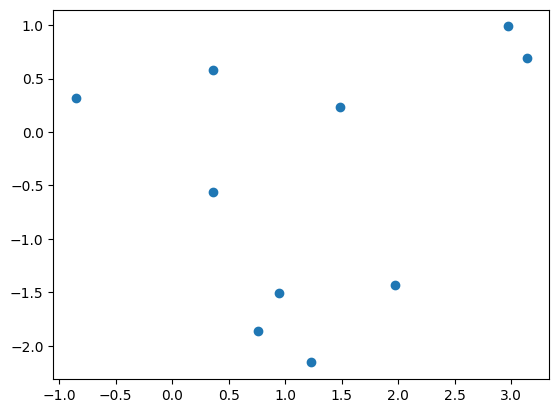

In [8]:
plt.scatter(x[::, 0], x[::, 1])
plt.show()

In [25]:
x1 = x[0]


x_norm = (x1 - min(x1)) / (max(x1) - min(x1))
x_norm

array([1.        , 0.03854405, 0.47797853, 0.27659184, 0.        ,
       0.68353876, 0.86770082, 0.57478967, 0.78784793, 0.59007312])

In [27]:
print(max(x_norm))
print(min(x_norm))
print(np.mean(x_norm))

1.0
0.0
0.5297064714293676


In [50]:
x_stand = x[0] - x[0].mean()

In [51]:
print(np.mean(x_stand))
print(np.max(x_stand))
print(np.min(x_stand))

0.0
1.6660496592524847
-1.8765244100019338


In [59]:
titanic = pd.read_csv('train.csv')

titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


---------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1, 11)
y = 2 * x + np.random.rand(10) * 2

X = np.vstack((x, y))
X

array([[ 1.        ,  2.        ,  3.        ,  4.        ,  5.        ,
         6.        ,  7.        ,  8.        ,  9.        , 10.        ],
       [ 3.27598904,  4.31132124,  6.64997914,  9.16712031, 10.87291777,
        12.75250198, 15.71554436, 17.57134925, 18.78197063, 20.94335153]])

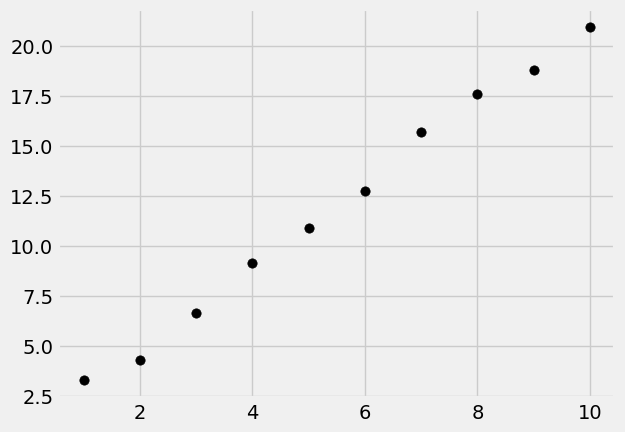

In [2]:
plt.style.use('fivethirtyeight')
plt.scatter(x, y, s=45, c='black')
plt.grid(True)
plt.show()

In [3]:
Xcenter = (X[0] - x.mean(), X[1] - y.mean())
m = (x.mean(), y.mean())

print('center: ',  Xcenter)
print('\n')
print('Vector: ', m)

center:  (array([-4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5]), array([-8.72821548, -7.69288329, -5.35422539, -2.83708421, -1.13128676,
        0.74829745,  3.71133984,  5.56714473,  6.7777661 ,  8.93914701]))


Vector:  (5.5, 12.004204525438936)


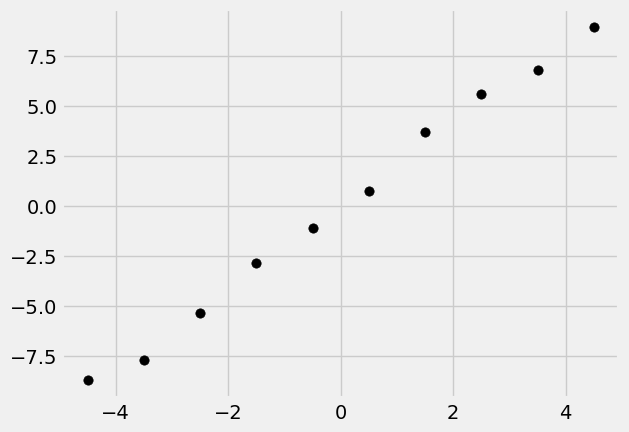

In [4]:
plt.style.use('fivethirtyeight')
plt.scatter(Xcenter[0], Xcenter[1], s=45, c='black')
plt.grid(True)
plt.show()

In [5]:
covmat = np.cov(Xcenter)

print(covmat, '\n')
print('variance of x:', np.cov(Xcenter)[0, 0])
print('variance of y:', np.cov(Xcenter)[1, 1])
print('Covariance x and y: ', np.cov(Xcenter)[0, 1])

[[ 9.16666667 18.69069528]
 [18.69069528 38.28137113]] 

variance of x: 9.166666666666666
variance of y: 38.28137113147551
Covariance x and y:  18.690695279170466


In [6]:
_, vecs = np.linalg.eig(covmat)
v = -vecs[:, 1]
X_new = np.dot(v, Xcenter)

print('linalg.eig', np.linalg.eig(covmat), '\n')
print('-',  _ , '\n')
print('vecs', vecs, '\n')
print('v', v, '\n')
print('x_new', X_new)

linalg.eig EigResult(eigenvalues=array([3.31220389e-02, 4.74149158e+01]), eigenvectors=array([[-0.89846266, -0.43904995],
       [ 0.43904995, -0.89846266]])) 

- [3.31220389e-02 4.74149158e+01] 

vecs [[-0.89846266 -0.43904995]
 [ 0.43904995 -0.89846266]] 

v [0.43904995 0.89846266] 

x_new [-9.81770043 -8.44844316 -5.90819643 -3.20758914 -1.23594388  0.89184229
  3.99307517  6.09949651  7.62624455 10.00721452]


In [ ]:
X.nea

In [7]:
n = 9

Xrestored = np.dot(X_new[n], v) + m

print('restored', Xrestored)

print('Original', X[:,n])

restored [ 9.893667   20.99531306]
Original [10.         20.94335153]


In [8]:
n

9

In [76]:
X

array([[ 1.        ,  2.        ,  3.        ,  4.        ,  5.        ,
         6.        ,  7.        ,  8.        ,  9.        , 10.        ],
       [ 3.99874202,  4.00045399,  6.13047281,  9.46546637, 10.67662688,
        13.4095424 , 14.72405687, 16.05888339, 18.78243619, 21.60381356]])

In [77]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
XPCA = pca.fit_transform(np.transpose(X))

In [78]:
XPCA

array([[-9.06390857],
       [-8.61910218],
       [-6.26650866],
       [-2.83379114],
       [-1.30485049],
       [ 1.58817196],
       [ 3.20975777],
       [ 4.84955105],
       [ 7.73418087],
       [10.70649938]])

In [84]:
X_new

array([-9.06390857, -8.61910218, -6.26650866, -2.83379114, -1.30485049,
        1.58817196,  3.20975777,  4.84955105,  7.73418087, 10.70649938])

-------------

In [17]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

x, y = load_iris(return_X_y=True)

load_iris().target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
df = pd.DataFrame(x, columns=load_iris().feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


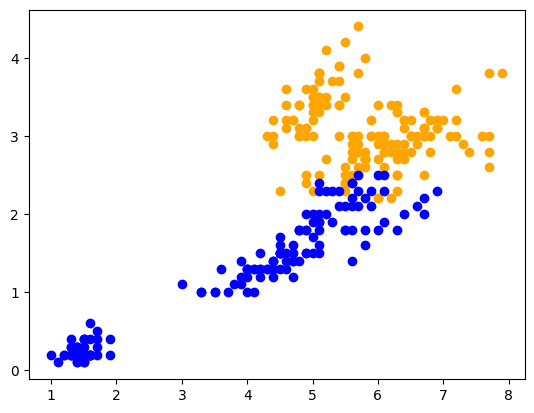

In [12]:
plt.scatter(df.iloc[::, 0], df.iloc[::, 1], c='orange')
plt.scatter(df.iloc[::, 2], df.iloc[::, 3], c='blue')
plt.show()

In [5]:
X_trans = df - df.mean()
X_trans

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333
...,...,...,...,...
145,0.856667,-0.057333,1.442,1.100667
146,0.456667,-0.557333,1.242,0.700667
147,0.656667,-0.057333,1.442,0.800667
148,0.356667,0.342667,1.642,1.100667


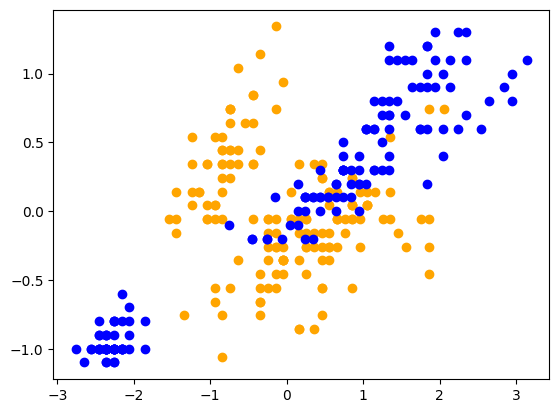

In [13]:
plt.scatter(X_trans.iloc[::, 0], X_trans.iloc[::, 1], c='orange')
plt.scatter(X_trans.iloc[::, 2], X_trans.iloc[::, 3], c='blue')
plt.show()

In [71]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np

In [26]:
scalar_minmax = MinMaxScaler()
normal = scalar_minmax.fit_transform(df)

scale_stand = StandardScaler()
standart = scale_stand.fit_transform(df)

In [31]:
standart.shape

(150, 4)

In [34]:
normal.shape

(150, 4)

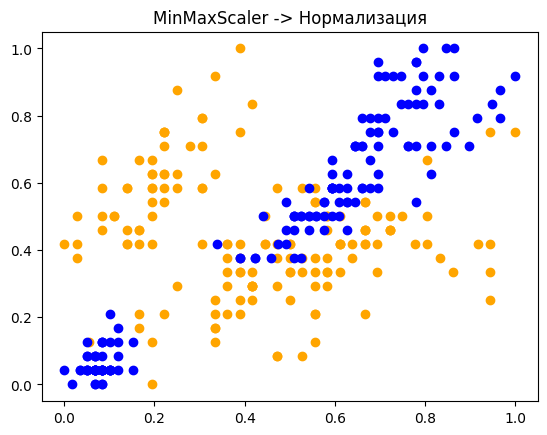

In [35]:
plt.scatter(normal[::, 0], normal[::, 1], c='orange')
plt.scatter(normal[::, 2], normal[::, 3], c='blue')
plt.title("MinMaxScaler -> Нормализация")
plt.show()

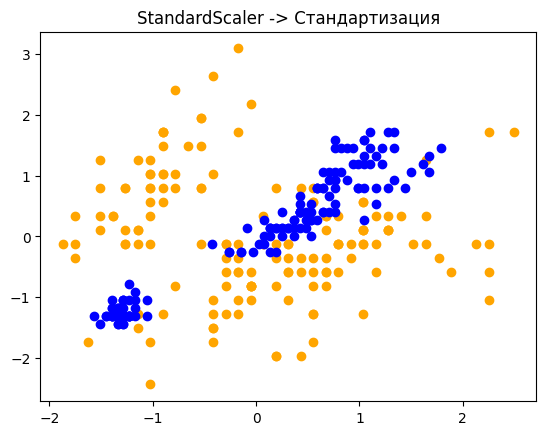

In [36]:
plt.scatter(standart[::, 0], standart[::, 1], c='orange')
plt.scatter(standart[::, 2], standart[::, 3], c='blue')
plt.title("StandardScaler -> Стандартизация")
plt.show()

In [80]:
PCA_model = PCA(n_components=2)
X_componets = PCA_model.fit_transform(df)

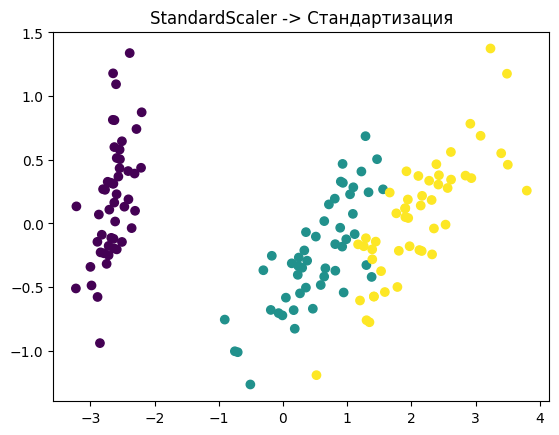

In [81]:
plt.scatter(X_componets[::, 0], X_componets[::, 1], c=y)
plt.title("StandardScaler -> Стандартизация")
plt.show()

In [82]:
print(PCA_model.explained_variance_ratio_)
print(np.sum(PCA_model.explained_variance_ratio_))


[0.92461872 0.05306648]
0.977685206318795


In [83]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [66]:
cols = ['1', '2', '3', '4']
new = pd.DataFrame(normal, columns=cols)

df_concat = pd.concat([df, new], axis=1)
df_concat

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),1,2,3,4
0,5.1,3.5,1.4,0.2,0.222222,0.625000,0.067797,0.041667
1,4.9,3.0,1.4,0.2,0.166667,0.416667,0.067797,0.041667
2,4.7,3.2,1.3,0.2,0.111111,0.500000,0.050847,0.041667
3,4.6,3.1,1.5,0.2,0.083333,0.458333,0.084746,0.041667
4,5.0,3.6,1.4,0.2,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.666667,0.416667,0.711864,0.916667
146,6.3,2.5,5.0,1.9,0.555556,0.208333,0.677966,0.750000
147,6.5,3.0,5.2,2.0,0.611111,0.416667,0.711864,0.791667
148,6.2,3.4,5.4,2.3,0.527778,0.583333,0.745763,0.916667


In [65]:
# Пример DataFrame
df1 = pd.DataFrame({
    'A': [1, 2],
    'B': [3, 4]
})

df2 = pd.DataFrame({
    'A': [5, 6],
    'B': [7, 8]
})

# Объединение
result = pd.concat([df1, df2], ignore_index=True)

print(result)

   A  B
0  1  3
1  2  4
2  5  7
3  6  8


------

In [58]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

In [131]:
x, y = datasets.make_classification(n_samples=1000, n_features=10
                                   ,n_classes=3, n_clusters_per_class=1, n_informative=3,
                                   n_redundant=1, n_repeated=4, random_state=1, weights=[0.2, 0.5, 0.3])

In [132]:
df = pd.DataFrame(x)

In [133]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,-2.817341,-1.079835,1.536399,3.098923,-1.079835,-2.817341,1.536399,1.536399,-1.056298,1.214863
1,-0.499612,0.161459,-1.039946,0.423256,0.161459,-0.499612,-1.039946,-1.039946,-0.288326,-1.452081
2,-1.508890,0.619598,-0.590656,1.031953,0.619598,-1.508890,-0.590656,-0.590656,0.867951,-0.380744
3,-0.361133,-0.208658,1.274275,0.368920,-0.208658,-0.361133,1.274275,1.274275,-0.629216,1.370237
4,-0.246494,-1.182150,0.795584,0.881844,-1.182150,-0.246494,0.795584,0.795584,0.048890,-2.006806


In [134]:
df.corr()

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.323501,0.093657,-0.882500,0.323501,1.000000,0.093657,0.093657,0.054513,0.002753
1,0.323501,1.000000,-0.336913,-0.728703,1.000000,0.323501,-0.336913,-0.336913,-0.006762,-0.002674
2,0.093657,-0.336913,1.000000,0.060285,-0.336913,0.093657,1.000000,1.000000,0.045248,-0.004716
3,-0.882500,-0.728703,0.060285,1.000000,-0.728703,-0.882500,0.060285,0.060285,-0.037423,-0.000367
4,0.323501,1.000000,-0.336913,-0.728703,1.000000,0.323501,-0.336913,-0.336913,-0.006762,-0.002674
5,1.000000,0.323501,0.093657,-0.882500,0.323501,1.000000,0.093657,0.093657,0.054513,0.002753
6,0.093657,-0.336913,1.000000,0.060285,-0.336913,0.093657,1.000000,1.000000,0.045248,-0.004716
7,0.093657,-0.336913,1.000000,0.060285,-0.336913,0.093657,1.000000,1.000000,0.045248,-0.004716
8,0.054513,-0.006762,0.045248,-0.037423,-0.006762,0.054513,0.045248,0.045248,1.000000,-0.022496
9,0.002753,-0.002674,-0.004716,-0.000367,-0.002674,0.002753,-0.004716,-0.004716,-0.022496,1.000000


In [135]:
df.shape

(1000, 10)

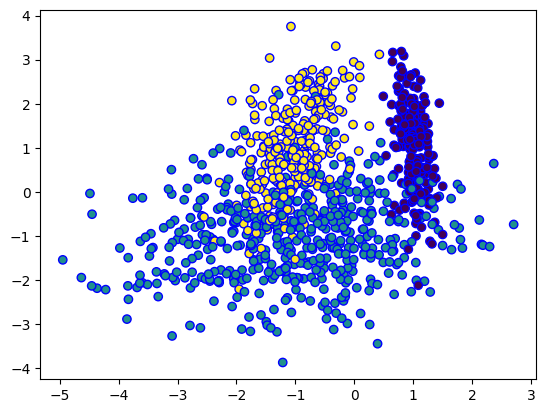

In [136]:
plt.scatter(x[::, 0], x[::, 1], c=y, cmap='viridis', edgecolors='b')
plt.show()

In [137]:
pca = PCA(n_components=4)
pca.fit(x, y)

PCA(n_components=4)

In [138]:
x_pca = pca.fit_transform(x)

print(pca.explained_variance_ratio_, '\n')
print(sum(pca.explained_variance_ratio_))

[0.47393095 0.28371529 0.11378143 0.06803391] 

0.9394615790344703


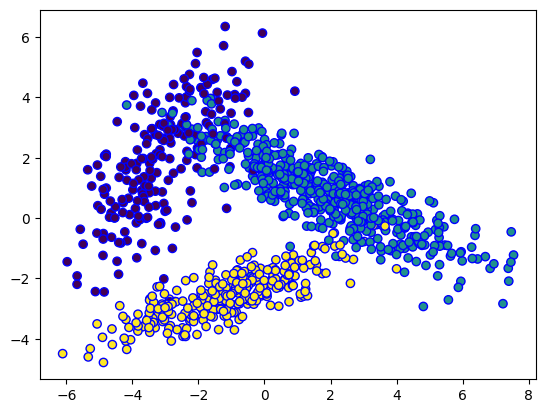

In [139]:
plt.scatter(x_pca[::, 0], x_pca[::, 1], c=y, cmap='viridis', edgecolors='b')
plt.show()

----------

In [140]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(df, y)

LinearDiscriminantAnalysis(n_components=2)

In [141]:
x_lda = lda.fit_transform(x, y)

In [142]:
print(sum(lda.explained_variance_ratio_))

1.0


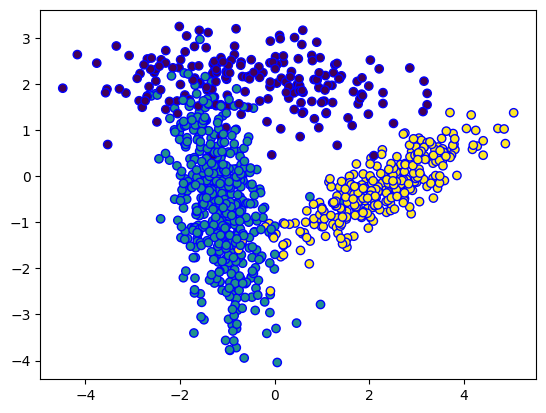

In [143]:
plt.scatter(x_lda[::, 0], x_lda[::, 1], c=y, cmap='viridis', edgecolors='b')
plt.show()

In [121]:
x_lda

array([[-0.12159687,  1.57100915],
       [-1.33364105,  0.42997536],
       [-1.48362686,  0.2827633 ],
       ...,
       [-0.02392227,  0.06811044],
       [-0.30861105, -1.10769504],
       [-2.82264054,  1.33859764]])

In [144]:
import seaborn as sns

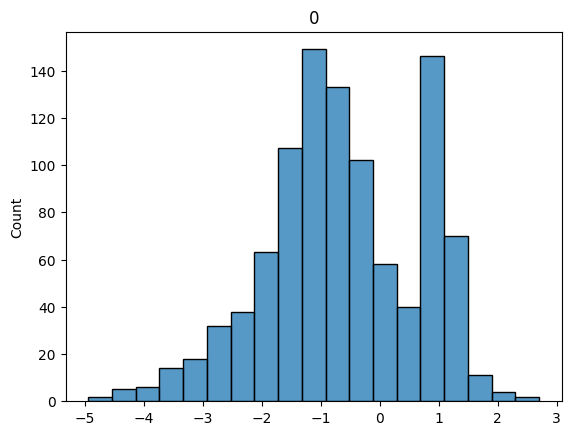

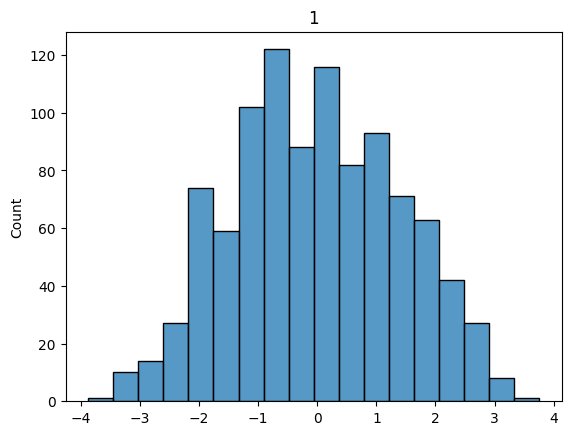

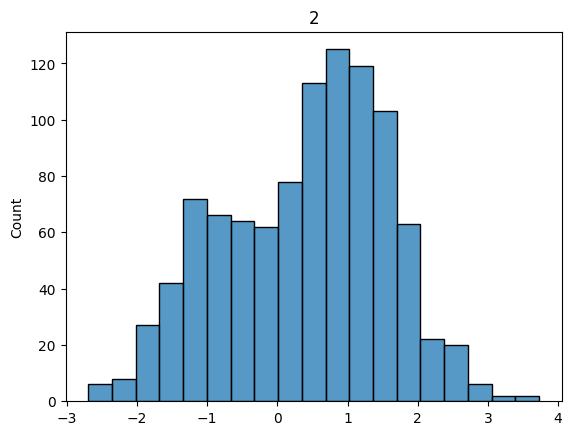

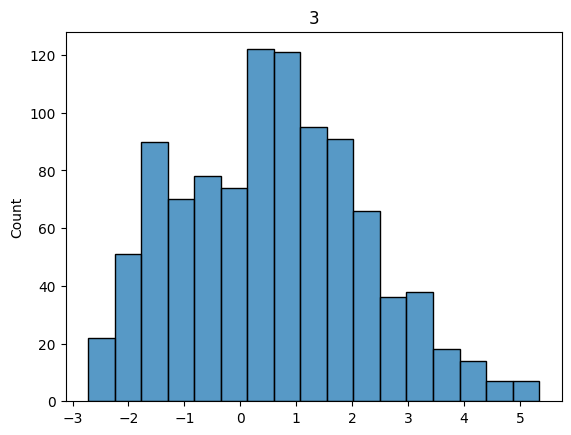

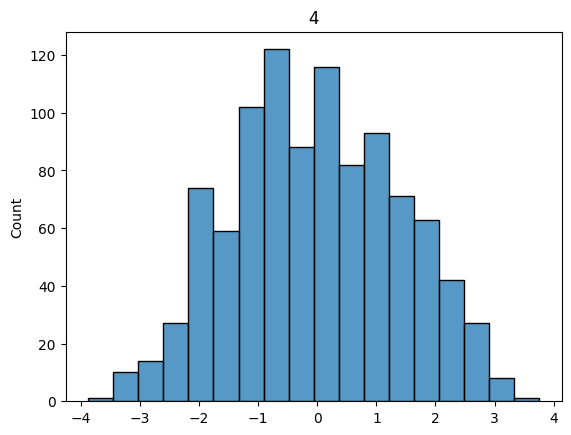

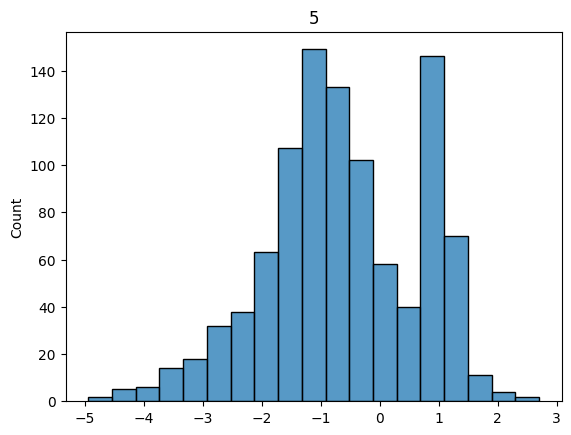

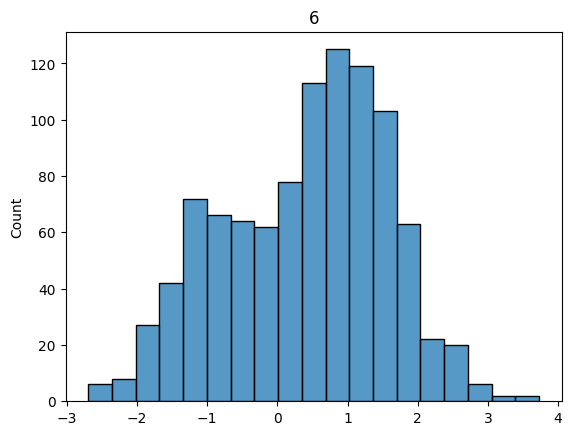

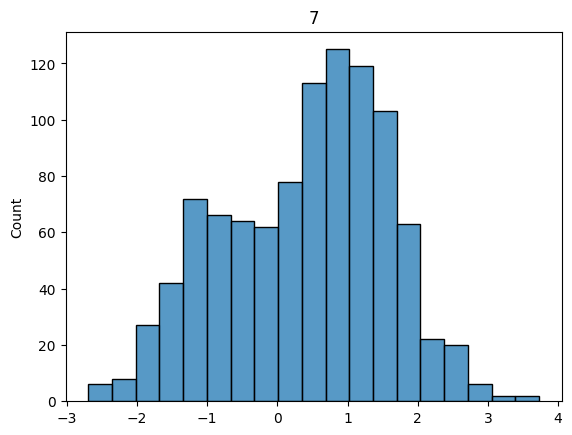

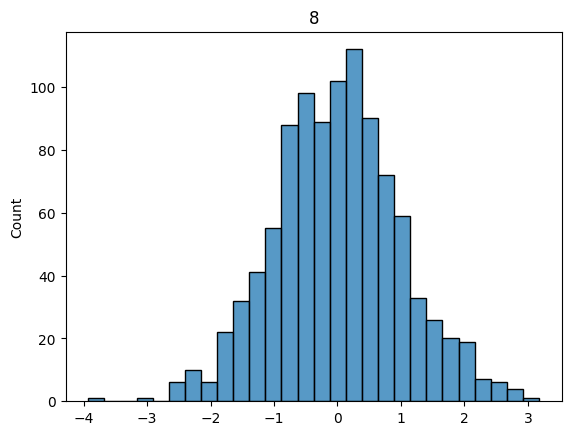

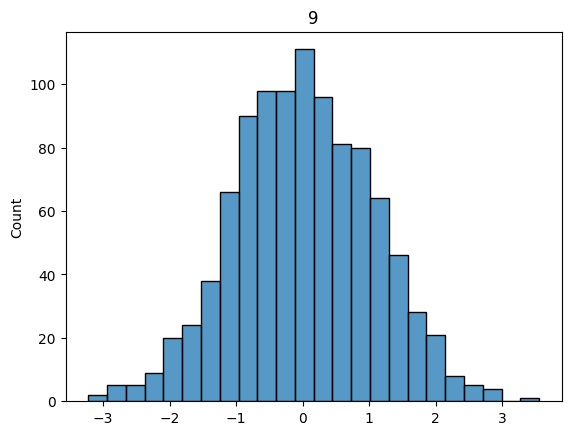

In [151]:
for i in range(0, 10):
    sns.histplot(x[::, i])
    plt.title(i)
    plt.show()

In [152]:
for i in df:
    print(i)

0
1
2
3
4
5
6
7
8
9
